# Lesson 1 - Resistance 1DOF Surge Motion

## Equation of Motion

In [1]:
# import required libraries
import math as math              # for maths functions such as sqrt, log10
import numpy as np               # for array of state data
import matplotlib.pyplot as plt  # for plotting
import matplotlib.gridspec as gridspec
import time                      # for recording cpu time

In [2]:
# Constant Parameters
Lpp   = 178                 # Length between Perpendicular [m]
B     = 32.26               # Breadth [m]
d     = 11.57               # Draft [m]
Cb    = 0.84                # Block Coefficient
A_wet = 8750                # Wetted Surface Area [m^2]
nu_w  = 1.1883e-6           # Kinematic Viscosity of Water [m^2/s]
rho_w = 1025                # Density of Water [kg/m^3]
K     = 0.37                # Form Factor (for correction of flate plate to ship shape resistance)

mx_ND = 0.08                # Added masss in longitudinal direction (x-dir) [Non Dimensionalized]
m     = rho_w*Lpp*B*d*Cb    # Ship Mass
mx    = mx_ND*m             # Redimensionalized 

In [3]:
# Hull Reaction Forces (Resistance) Calculation
def hull_force(x):
    uvel = x[1]
    U    = uvel
    Re   = U*Lpp/nu_w
    C_F0 = 0.463*(math.log10(Re))**(-2.6)
    R    = C_F0 * (0.5*rho_w*A_wet*U**2)*(1+K)
    tau_hull = -R
    return tau_hull

In [4]:
# Combine Forces and ODEs
def state_fun(x):
    u = x[1]
    tau_hull = hull_force(x)
    tau_surge = tau_hull
    
    xpos_dot = u
    uvel_dot = tau_surge/(m+mx)
    x_dot = np.array([xpos_dot, uvel_dot])
    return x_dot

In [5]:
# Euler Integration Method (1st Order)
def euler(x,dt):
    state_next = x + dt*state_fun(x)
    return state_next

In [6]:
# Range-Kutta Integration Method (4th Order)
def RKGill(x,dt):
    k1  = state_fun(x)
    tmp = x + 0.5*dt*k1
    
    k2  = state_fun(tmp)
    tmp = x + 0.5*dt*(math.sqrt(2)-1)*k1 + dt*(1-(1/math.sqrt(2)))*k2
    
    k3  = state_fun(tmp)
    tmp = x - 0.5*dt*math.sqrt(2)*k2 + dt*(1+(1/math.sqrt(2)))*k3
    
    k4  = state_fun(tmp)
    state_next = x + dt*(k1+(2-math.sqrt(2))*k2+(2+math.sqrt(2))*k3+k4)/6
    return state_next

In [7]:
# Time-domain Simulation Function
def simulate(x0,t0,tf,dt):
    print("Simulation Start!")
    x = x0
    t_vec = np.arange(t0,tf,dt)
    xpos  = np.zeros(t_vec.size)
    uvel  = np.zeros(t_vec.size)
    idx = 0
    for i in t_vec:
#         state_next = euler(x,dt)
        state_next = RKGill(x,dt)
        x = state_next
        xpos[idx] = x[0]
        uvel[idx] = x[1]
        idx += 1
    print("Simulation Finished!")
    return t_vec, xpos, uvel    

In [8]:
# Plot
def plot(t_vec,xpos,uvel):
    fig = plt.figure()
#    gs = gridspec.GridSpec(2, 1, figure=fig)
    ax1 = fig.add_subplot(311)
    ax1.plot(t_vec, xpos)
    ax1.set(xlabel='time (s)', ylabel='X (m)',
           title='Timeseries of X Position')
    ax1.grid()
    
    ax2 = fig.add_subplot(313)
    ax2.plot(t_vec, uvel)
    ax2.set(xlabel='time (s)', ylabel='u (m/s)',
            title='Timeseries of Surge Velocity')
    ax2.grid()
    fig.savefig("test.png")
    plt.show()
   


Simulation Start!
Simulation Finished!
cpuTime: 9.48 sec


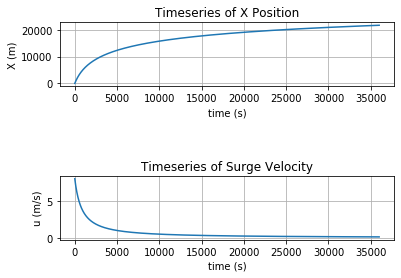

In [17]:
# MAIN PROGRAM
# Initial Conditions
uvel0 = 8
xpos0 = 0
x0 = np.array([xpos0, uvel0])

# Simulate
t_start = time.time() # to record cpuTime
t_vec, xpos, uvel = simulate(x0,0,3600*10,0.1)
t_end   = time.time() # to record cpuTime
cpuTime = round(t_end - t_start,2)
print("cpuTime:",cpuTime, "sec")
plot(t_vec,xpos,uvel) # call plot function

In [18]:
cpuTime = round(t_end - t_start,2)
print("cpuTime: ",cpuTime, "sec")
print(uvel[-1])

cpuTime:  9.48 sec
0.11877604439009412
